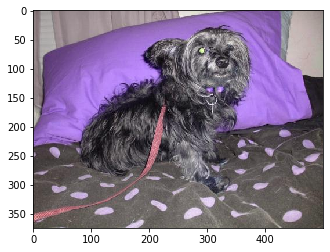

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"C:\Users\user\pythonwork\PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img)) #img_array is a matrix. #Does it involve tensor?
        plt.imshow(img_array)  #plt.imshow(img_array) would be an image. 
        plt.show() 
        
        break  
    break

In [48]:
print(img_array)
print(img_array.shape)

[[[126 115 117]
  [126 115 117]
  [130 117 119]
  ...
  [142 132 132]
  [141 131 131]
  [141 131 131]]

 [[127 116 118]
  [126 115 117]
  [130 117 119]
  ...
  [144 134 134]
  [143 133 133]
  [143 133 133]]

 [[128 117 119]
  [127 116 118]
  [131 118 120]
  ...
  [146 136 136]
  [145 135 135]
  [145 135 135]]

 ...

 [[ 84  80  75]
  [ 79  75  70]
  [ 78  74  69]
  ...
  [ 85  82  74]
  [ 81  78  70]
  [ 78  75  67]]

 [[ 83  79  74]
  [ 77  73  68]
  [ 74  70  65]
  ...
  [ 77  74  66]
  [ 78  75  67]
  [ 79  76  68]]

 [[ 79  75  70]
  [ 76  72  67]
  [ 75  71  66]
  ...
  [ 80  77  69]
  [ 78  75  67]
  [ 76  73  65]]]
(375, 500, 3)


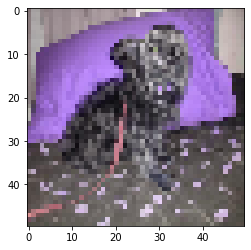

In [49]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [50]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [00:49<00:00, 252.82it/s]


24946


In [54]:
X = []
y = []

for image,label in training_data:
    X.append(image)
    y.append(label)

In [56]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

X2 = X.astype('float32')
X3=X2/255.0

In [57]:
X3.shape

(24946, 50, 50, 3)

In [58]:
X3[0]

array([[[0.49803922, 0.44313726, 0.4509804 ],
        [0.6431373 , 0.62352943, 0.627451  ],
        [0.6392157 , 0.62352943, 0.61960787],
        ...,
        [0.65882355, 0.6156863 , 0.6       ],
        [0.62352943, 0.5764706 , 0.5686275 ],
        [0.5882353 , 0.5411765 , 0.53333336]],

       [[0.52156866, 0.46666667, 0.4745098 ],
        [0.65882355, 0.6392157 , 0.6431373 ],
        [0.6666667 , 0.6509804 , 0.64705884],
        ...,
        [0.68235296, 0.6392157 , 0.62352943],
        [0.6431373 , 0.59607846, 0.5882353 ],
        [0.6156863 , 0.5686275 , 0.56078434]],

       [[0.53333336, 0.47843137, 0.4862745 ],
        [0.64705884, 0.627451  , 0.6313726 ],
        [0.65882355, 0.6431373 , 0.6392157 ],
        ...,
        [0.7058824 , 0.654902  , 0.64705884],
        [0.6745098 , 0.6313726 , 0.6156863 ],
        [0.6313726 , 0.5921569 , 0.5764706 ]],

       ...,

       [[0.8666667 , 0.5764706 , 0.5764706 ],
        [0.7176471 , 0.46666667, 0.4862745 ],
        [0.45882353, 0

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X3.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

y = np.array(y)

model.fit(X3, y, batch_size=32, epochs=2, validation_split=0.3)

Train on 17462 samples, validate on 7484 samples
Epoch 1/2


 5632/17462 [========>.....................] - ETA: 23:49 - loss: 0.6906 - accuracy: 0.625 - ETA: 20:53 - loss: 2.4901 - accuracy: 0.687 - ETA: 19:32 - loss: 1.9890 - accuracy: 0.697 - ETA: 18:52 - loss: 1.7065 - accuracy: 0.617 - ETA: 18:26 - loss: 1.5183 - accuracy: 0.556 - ETA: 18:09 - loss: 1.3852 - accuracy: 0.494 - ETA: 17:56 - loss: 1.2856 - accuracy: 0.513 - ETA: 17:44 - loss: 1.2083 - accuracy: 0.535 - ETA: 17:36 - loss: 1.1427 - accuracy: 0.559 - ETA: 17:32 - loss: 1.0783 - accuracy: 0.587 - ETA: 17:29 - loss: 1.0328 - accuracy: 0.602 - ETA: 17:47 - loss: 0.9925 - accuracy: 0.614 - ETA: 17:40 - loss: 0.9684 - accuracy: 0.620 - ETA: 17:34 - loss: 0.9525 - accuracy: 0.622 - ETA: 17:31 - loss: 0.9331 - accuracy: 0.625 - ETA: 17:27 - loss: 0.9124 - accuracy: 0.630 - ETA: 17:22 - loss: 0.8933 - accuracy: 0.639 - ETA: 17:18 - loss: 0.8775 - accuracy: 0.645 - ETA: 17:13 - loss: 0.8609 - accuracy: 0.656 - ETA: 17:08 - loss: 0.8488 - accuracy: 0.657 - ETA: 17:06 - loss: 0.8338 - accur

11488/17462 [==================>...........] - ETA: 11:50 - loss: 0.6301 - accuracy: 0.697 - ETA: 11:48 - loss: 0.6295 - accuracy: 0.698 - ETA: 11:46 - loss: 0.6294 - accuracy: 0.698 - ETA: 11:44 - loss: 0.6291 - accuracy: 0.697 - ETA: 11:42 - loss: 0.6286 - accuracy: 0.698 - ETA: 11:40 - loss: 0.6288 - accuracy: 0.697 - ETA: 11:38 - loss: 0.6284 - accuracy: 0.698 - ETA: 11:36 - loss: 0.6273 - accuracy: 0.698 - ETA: 11:34 - loss: 0.6265 - accuracy: 0.699 - ETA: 11:32 - loss: 0.6259 - accuracy: 0.699 - ETA: 11:30 - loss: 0.6257 - accuracy: 0.699 - ETA: 11:28 - loss: 0.6258 - accuracy: 0.699 - ETA: 11:26 - loss: 0.6247 - accuracy: 0.700 - ETA: 11:24 - loss: 0.6242 - accuracy: 0.700 - ETA: 11:22 - loss: 0.6242 - accuracy: 0.700 - ETA: 11:21 - loss: 0.6234 - accuracy: 0.701 - ETA: 11:19 - loss: 0.6230 - accuracy: 0.701 - ETA: 11:17 - loss: 0.6218 - accuracy: 0.702 - ETA: 11:16 - loss: 0.6211 - accuracy: 0.702 - ETA: 11:14 - loss: 0.6213 - accuracy: 0.702 - ETA: 11:12 - loss: 0.6221 - accur

17440/17462 [============================>.] - ETA: 5:55 - loss: 0.6009 - accuracy: 0.70 - ETA: 5:53 - loss: 0.6007 - accuracy: 0.70 - ETA: 5:51 - loss: 0.6007 - accuracy: 0.70 - ETA: 5:49 - loss: 0.6005 - accuracy: 0.70 - ETA: 5:47 - loss: 0.6006 - accuracy: 0.70 - ETA: 5:46 - loss: 0.6008 - accuracy: 0.70 - ETA: 5:44 - loss: 0.6006 - accuracy: 0.70 - ETA: 5:42 - loss: 0.6007 - accuracy: 0.70 - ETA: 5:40 - loss: 0.6004 - accuracy: 0.70 - ETA: 5:38 - loss: 0.6002 - accuracy: 0.70 - ETA: 5:36 - loss: 0.5998 - accuracy: 0.70 - ETA: 5:34 - loss: 0.5999 - accuracy: 0.70 - ETA: 5:32 - loss: 0.5995 - accuracy: 0.70 - ETA: 5:30 - loss: 0.5996 - accuracy: 0.70 - ETA: 5:28 - loss: 0.5992 - accuracy: 0.70 - ETA: 5:26 - loss: 0.5988 - accuracy: 0.71 - ETA: 5:24 - loss: 0.5984 - accuracy: 0.71 - ETA: 5:22 - loss: 0.5985 - accuracy: 0.71 - ETA: 5:20 - loss: 0.5984 - accuracy: 0.71 - ETA: 5:18 - loss: 0.5985 - accuracy: 0.71 - ETA: 5:16 - loss: 0.5987 - accuracy: 0.70 - ETA: 5:14 - loss: 0.5985 - ac

17462/17462 [==============================] - 1250s 72ms/sample - loss: 0.5828 - accuracy: 0.7166 - val_loss: 0.9036 - val_accuracy: 0.2011
Epoch 2/2


 5696/17462 [========>.....................] - ETA: 17:03 - loss: 0.5124 - accuracy: 0.843 - ETA: 16:55 - loss: 0.5222 - accuracy: 0.796 - ETA: 16:48 - loss: 0.5586 - accuracy: 0.729 - ETA: 16:44 - loss: 0.5601 - accuracy: 0.757 - ETA: 16:42 - loss: 0.5589 - accuracy: 0.762 - ETA: 16:39 - loss: 0.5679 - accuracy: 0.755 - ETA: 16:35 - loss: 0.5651 - accuracy: 0.754 - ETA: 16:33 - loss: 0.5533 - accuracy: 0.753 - ETA: 16:31 - loss: 0.5633 - accuracy: 0.746 - ETA: 16:29 - loss: 0.5533 - accuracy: 0.753 - ETA: 16:26 - loss: 0.5424 - accuracy: 0.755 - ETA: 16:24 - loss: 0.5455 - accuracy: 0.752 - ETA: 16:22 - loss: 0.5330 - accuracy: 0.762 - ETA: 16:21 - loss: 0.5345 - accuracy: 0.763 - ETA: 16:19 - loss: 0.5299 - accuracy: 0.766 - ETA: 16:18 - loss: 0.5297 - accuracy: 0.765 - ETA: 16:15 - loss: 0.5366 - accuracy: 0.753 - ETA: 16:14 - loss: 0.5335 - accuracy: 0.756 - ETA: 16:12 - loss: 0.5415 - accuracy: 0.750 - ETA: 16:10 - loss: 0.5374 - accuracy: 0.751 - ETA: 16:08 - loss: 0.5387 - accur

11584/17462 [==================>...........] - ETA: 11:21 - loss: 0.5311 - accuracy: 0.739 - ETA: 11:19 - loss: 0.5308 - accuracy: 0.739 - ETA: 11:17 - loss: 0.5304 - accuracy: 0.739 - ETA: 11:16 - loss: 0.5306 - accuracy: 0.739 - ETA: 11:14 - loss: 0.5301 - accuracy: 0.739 - ETA: 11:12 - loss: 0.5291 - accuracy: 0.740 - ETA: 11:10 - loss: 0.5298 - accuracy: 0.739 - ETA: 11:08 - loss: 0.5299 - accuracy: 0.739 - ETA: 11:06 - loss: 0.5297 - accuracy: 0.740 - ETA: 11:04 - loss: 0.5290 - accuracy: 0.740 - ETA: 11:02 - loss: 0.5288 - accuracy: 0.740 - ETA: 11:00 - loss: 0.5288 - accuracy: 0.740 - ETA: 10:59 - loss: 0.5283 - accuracy: 0.741 - ETA: 10:57 - loss: 0.5278 - accuracy: 0.741 - ETA: 10:55 - loss: 0.5274 - accuracy: 0.741 - ETA: 10:53 - loss: 0.5279 - accuracy: 0.741 - ETA: 10:51 - loss: 0.5285 - accuracy: 0.740 - ETA: 10:49 - loss: 0.5282 - accuracy: 0.740 - ETA: 10:48 - loss: 0.5290 - accuracy: 0.740 - ETA: 10:46 - loss: 0.5289 - accuracy: 0.740 - ETA: 10:44 - loss: 0.5292 - accur

17462/17462 [==============================] - ETA: 5:38 - loss: 0.5301 - accuracy: 0.73 - ETA: 5:37 - loss: 0.5299 - accuracy: 0.73 - ETA: 5:35 - loss: 0.5297 - accuracy: 0.73 - ETA: 5:33 - loss: 0.5299 - accuracy: 0.73 - ETA: 5:31 - loss: 0.5306 - accuracy: 0.73 - ETA: 5:29 - loss: 0.5302 - accuracy: 0.73 - ETA: 5:28 - loss: 0.5304 - accuracy: 0.73 - ETA: 5:26 - loss: 0.5302 - accuracy: 0.73 - ETA: 5:24 - loss: 0.5301 - accuracy: 0.73 - ETA: 5:22 - loss: 0.5303 - accuracy: 0.73 - ETA: 5:21 - loss: 0.5303 - accuracy: 0.73 - ETA: 5:19 - loss: 0.5303 - accuracy: 0.73 - ETA: 5:17 - loss: 0.5304 - accuracy: 0.73 - ETA: 5:15 - loss: 0.5302 - accuracy: 0.73 - ETA: 5:14 - loss: 0.5302 - accuracy: 0.73 - ETA: 5:12 - loss: 0.5302 - accuracy: 0.73 - ETA: 5:10 - loss: 0.5299 - accuracy: 0.73 - ETA: 5:08 - loss: 0.5300 - accuracy: 0.73 - ETA: 5:06 - loss: 0.5297 - accuracy: 0.73 - ETA: 5:04 - loss: 0.5298 - accuracy: 0.73 - ETA: 5:03 - loss: 0.5298 - accuracy: 0.73 - ETA: 5:01 - loss: 0.5296 - ac

In [64]:
model.save('CNN_model2.h5')

In [65]:
import tensorflow as tf 

model = tf.keras.models.load_model('CNN_model2.h5')

In [66]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
explainer = lime_image.LimeImageExplainer()

In [72]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(X3[0], model.predict, top_labels=1, hide_color=0, num_samples=1000)


Wall time: 33.7 s


In [69]:
from skimage.segmentation import mark_boundaries

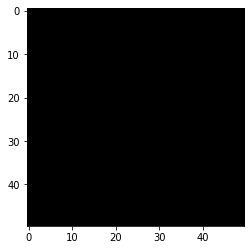

In [73]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

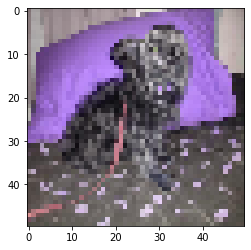

In [71]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [21]:
import os
import sys
import argparse
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from skimage.segmentation import slic
from lime import lime_image
from pdb import set_trace

In [23]:
def predict(input):
    # input: numpy array, (batches, height, width, channels)                                                                                                                                                     
    
    model.eval()                                                                                                                                                             
    input = torch.FloatTensor(input).permute(0, 3, 1, 2)                                                                                                            
    # 需要先將 input 轉成 pytorch tensor，且符合 pytorch 習慣的 dimension 定義
    # 也就是 (batches, channels, height, width)

    output = model(input.cpu())                                                                                                                                             
    return output.detach().cpu().numpy()                                                                                                                              
                                                                                                                                                                             
def segmentation(input):
    # 利用 skimage 提供的 segmentation 將圖片分成 100 塊                                                                                                                                      
    return slic(input, n_segments=100, compactness=1, sigma=1)  

In [37]:
x = X3.astype(np.double)
print(x[1])

[[[0.45490196]
  [0.49019608]
  [0.29411766]
  ...
  [0.34509805]
  [0.31764707]
  [0.23921569]]

 [[0.32549021]
  [0.49411765]
  [0.32156864]
  ...
  [0.36470589]
  [0.27058825]
  [0.22745098]]

 [[0.41568628]
  [0.45882353]
  [0.3882353 ]
  ...
  [0.10588235]
  [0.34509805]
  [0.26666668]]

 ...

 [[0.96078432]
  [0.95294118]
  [0.97647059]
  ...
  [0.90588236]
  [0.87843138]
  [0.84705883]]

 [[0.97647059]
  [0.96470588]
  [0.97647059]
  ...
  [0.93333334]
  [0.89019608]
  [0.89019608]]

 [[0.94117647]
  [0.93725491]
  [0.95294118]
  ...
  [0.95294118]
  [0.91764706]
  [0.91764706]]]


In [40]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Using TensorFlow backend.


Notebook run using keras: 2.3.1


In [41]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [42]:
explainer = lime_image.LimeImageExplainer()

In [45]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(X3[0], model.predict, top_labels=2, hide_color=0, num_samples=1000)

ValueError: the input array must be have a shape == (.., ..,[ ..,] 3)), got (50, 50, 1)